# Project Transfer Learning with VGG for a Fine-grain Classification Task

## Introduction

* This project applies Transfer Learning to the classification task to study fine grain classfication problems. Fine grain classifcation refers to the detailed classification problem rather than identifying a general class type. 

## Data
* This project uses data publically available through Kaggle. The data involves 1300-1400 images of 10 different monkey species. Each image varies in the size. The original data can be found at the following source. 
    * Source: https://www.kaggle.com/slothkong/10-monkey-species

* The ten monkey species are listed below. 

| Species Name | Common Name |
                  | ------  | ------ |
  | Alouatta Palliata |         Mantled Howler |
| Erythrocebus Patas	|  Patas Monkey |
| Cacajao Calvus | Bald Uakari |
| Macaca Fuscata | Japanese Macaque |
| Cebuella Pygmea | Pygmy Marmoset |
| Cebus Capucinus | White Headed Capuchin |
| Mico Argentatus | Silvery Marmoset |
| Saimiri Sciureus | Common Squirrel Monkey |
| Aotus Nigriceps	| Black Headed Night Monkey |
| Trachypithecus Johnii | Nilgiri Langur |

* All of the classes have 131-152 images for training and 26-30 for Validation. More information on the dataset can be found at the Kaggle pace for the dataset.



## Design
* To experiment and identify the effect of nerual network architecture on learning and image classification, multiple models each with the same learning rate and a different transfered model architecture.
    * The different model architectures analyzed fall into two distinct classes: ResNet and VGG
    * ResNet models analyzed
        * Model R1: ResNet-18
        * Model R2: ResNet-34
        * Model R3: ResNet-50
        * Model R4: ResNet-101
        * Model R5: ResNet-152
    * VGG models analyzed
        * Model V1: VGG-13
        * Model V2: VGG-16
        * Model V3: VGG-19
        * Model V4: VGG-13 with Batch Normalization
        * Model V5: VGG-16  with Batch Normalization
        * Model V6: VGG-19  with Batch Normalization
    * This notebook contains the VGG derived models
    
* Further information on the dataset and the approach taken in this project can be found in the report pdf located in the same repository. 

## Installing the required packages

In [1]:
#Import required packages
import torch 
import numpy as np
from torchvision import transforms, utils, datasets, models
import PIL.Image
import zipfile
import io
from google.colab import files
from torch import nn 
from torch import optim 
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import seaborn as sns
import pandas as pd


train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("Training on CPU")
else:
    print("Cuda is available. Training on GPU")

Cuda is available. Training on GPU


In [2]:

#Load image files through a zip file upload. 
#   Since the Kaggle dataset includes a prime number of images(1097), a random image index was removed
#   to allow for consistent batch sizes. There were 1096 total images with an individual batch size of 137.

uploaded = files.upload()


Saving train2.zip to train2.zip


In [0]:
#Unzip files
zf = zipfile.ZipFile(io.BytesIO(uploaded['train2.zip']), "r")
zf.extractall()

In [4]:
#Load the validation zip
# This collection is identical to the validation dataset provided from the Kaggle dataset page. 

validloaded = files.upload()

Saving valid.zip to valid.zip


In [0]:
#Unzip the validation zip

zf2 = zipfile.ZipFile(io.BytesIO(validloaded['valid.zip']), "r")
zf2.extractall()

## Building the Datasets

In [6]:
# Create the Test and Train Dataset
#     * This cell splits the uploaded training folder into a training and test dataset

#Using the subsetRandomSampler, isolate the test dataset as a random subset of the training data totalling 25% of the training data 
num_workers = 0
batch_size = 137
data_dir = 'train'
# 25% split of the training data= test data
test_size = 0.25
#Define the transformations for the training and test dataset. 
#  This transformation does not include any rotation or attribute skewing and therefore can also be applied to the test dataset
data_train_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

#Import the training dataset
traintest_data = datasets.ImageFolder(data_dir, transform = data_train_transforms)

#Randomly identify the image indices for the training and test datasets
count_train = len(traintest_data)
train_indices = list(range(count_train))
np.random.shuffle(train_indices)
traintestsplit = int(np.floor(test_size * count_train))
traindata_idx, testdata_idx = train_indices[traintestsplit:], train_indices[:traintestsplit]

train_sampler = SubsetRandomSampler(traindata_idx)
test_sampler = SubsetRandomSampler(testdata_idx)

#Create the training and test dataloaders
train_dataloader = torch.utils.data.DataLoader(traintest_data, batch_size=batch_size, sampler = train_sampler, num_workers=num_workers)
test_dataloader = torch.utils.data.DataLoader(traintest_data, batch_size = batch_size, sampler = test_sampler, num_workers = num_workers)
print("Train and test dataloaders were created")


Train and test dataloaders were created


In [7]:
# Create the Validation dataset

#Define the transforms for the dataset
data_valid_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

#Import the validation dataset
valid_dir = 'valid'
valid_data = datasets.ImageFolder(valid_dir, transform=data_valid_transforms)

#Create the validation dataloader
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True)

print("The validation datasets were defined")

The validation datasets were defined


## Model V1: VGG-13

Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /root/.cache/torch/checkpoints/vgg13-c768596a.pth
100%|██████████| 532194478/532194478 [00:16<00:00, 31739216.14it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.660215 	Validation Loss: 2.055503
Epoch: 1 	Training Loss: 1.406123 	Validation Loss: 1.804298
Epoch: 2 	Training Loss: 1.194524 	Validation Loss: 1.587782
Epoch: 3 	Training Loss: 1.017014 	Validation Loss: 1.401965
Epoch: 4 	Training Loss: 0.867237 	Validation Loss: 1.244133
Epoch: 5 	Training Loss: 0.744083 	Validation Loss: 1.112943
Epoch: 6 	Training Loss: 0.644875 	Validation Loss: 1.002847
Epoch: 7 	Training Loss: 0.563585 	Validation Loss: 0.911848
Epoch: 8 	Training Loss: 0.497420 	Validation Loss: 0.835859
Epoch: 9 	Training Loss: 0.442940 	Validation Loss: 0.771819
Epoch: 10 	Training Loss: 0.397417 	Validation Loss: 0.717547
Epoch: 11 	Training Loss: 0.360081 	Validation Loss: 0.671427
Epoch: 12 	Training Loss: 0.327772 	Validation Loss: 0.630907
Epoch: 13 	Training Loss: 0.299858 	Validation Loss: 0.595968
Epoch: 14 	Training Loss: 0.275908 	Validation Loss: 0.565640
Epoch: 15 	Training Loss: 0.255200 	Val

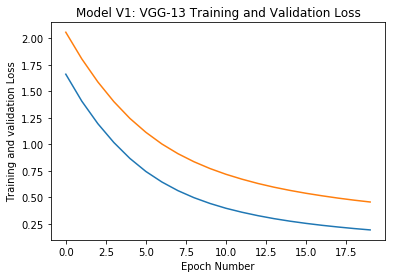

In [13]:
#Define the pretrained VGG-13 model
modelV1 = models.vgg13(pretrained=True)

#print("The num of model in features is ", model_features)

for param in modelV1.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        #VGG 13 input to classifier is 25088 features 
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV1 = Classifier()
modelV1.classifier=classifierV1

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV1.classifier.parameters(), lr = 0.001)

#Move the model to the GPU. 
modelV1.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV1 = []
validLossListV1 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV1.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        #print("The size of inputs is ", inputs.shape)
        #print("The size of labels is ", labels.shape)
        
        optimizer.zero_grad()
        
        logps = modelV1.forward(inputs)
        #print("The size of logps is ", logps.shape)
        
        loss = criterion(logps, labels)
        #print("The size of loss is ", loss.shape)
        
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV1.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelV1(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV1.append(train_loss)
    validLossListV1.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV1)), trainLossListV1)
plt.plot(np.arange(len(validLossListV1)), validLossListV1)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V1: VGG-13 Training and Validation Loss')
plt.show()

In [14]:
#Test Model V1 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV1.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV1(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


    


Test Loss: 0.121860

Test Accuracy of monkey1: 100% (27/27) 
Test Accuracy of monkey2: 100% (28/28) 
Test Accuracy of monkey3: 95% (20/21) 
Test Accuracy of monkey4: 93% (29/31) 
Test Accuracy of monkey5: 91% (32/35) 
Test Accuracy of monkey6: 94% (18/19) 
Test Accuracy of monkey7: 100% (27/27) 
Test Accuracy of monkey8: 93% (27/29) 
Test Accuracy of monkey9: 100% (29/29) 
Test Accuracy of monkey10: 100% (26/26) 

Test Accuracy (Overall): 96% (263/272)


## Model V2: VGG-16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:18<00:00, 29680456.03it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.556246 	Validation Loss: 1.860524
Epoch: 1 	Training Loss: 1.227504 	Validation Loss: 1.541173
Epoch: 2 	Training Loss: 0.989310 	Validation Loss: 1.299638
Epoch: 3 	Training Loss: 0.811526 	Validation Loss: 1.113492
Epoch: 4 	Training Loss: 0.678724 	Validation Loss: 0.968967
Epoch: 5 	Training Loss: 0.575325 	Validation Loss: 0.854589
Epoch: 6 	Training Loss: 0.495766 	Validation Loss: 0.764598
Epoch: 7 	Training Loss: 0.432756 	Validation Loss: 0.692963
Epoch: 8 	Training Loss: 0.382554 	Validation Loss: 0.633366
Epoch: 9 	Training Loss: 0.341811 	Validation Loss: 0.584516
Epoch: 10 	Training Loss: 0.307951 	Validation Loss: 0.543379
Epoch: 11 	Training Loss: 0.279856 	Validation Loss: 0.508561
Epoch: 12 	Training Loss: 0.255973 	Validation Loss: 0.478588
Epoch: 13 	Training Loss: 0.235703 	Validation Loss: 0.452682
Epoch: 14 	Training Loss: 0.217921 	Validation Loss: 0.430238
Epoch: 15 	Training Loss: 0.202564 	Val

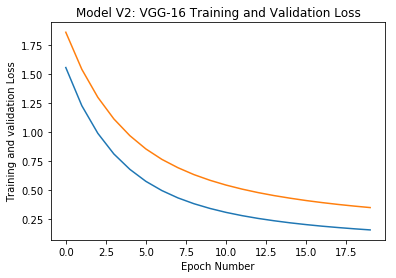

In [15]:
#Define the pretrained ResNet34 model
modelV2 = models.vgg16(pretrained=True)

#Freeze network parameters to make the VGG model a feature extractor
for param in modelV2.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV2 = Classifier()
modelV2.classifier=classifierV2

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV2.classifier.parameters(), lr = 0.001)

#Move the model to the GPU. 
modelV2.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV2 = []
validLossListV2 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV2.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelV2.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV2.eval()
    for vinputs, vlabels in valid_dataloader:
        vinputs, vlabels = vinputs.to(device), vlabels.to(device)
        voutput = modelV2(vinputs)
        vloss = criterion(voutput, vlabels)
        valid_loss += vloss.item()*vinputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV2.append(train_loss)
    validLossListV2.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV2)), trainLossListV2)
plt.plot(np.arange(len(validLossListV2)), validLossListV2)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V2: VGG-16 Training and Validation Loss')
plt.show()

In [16]:
#Test Model V2 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV2.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV2(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.083947

Test Accuracy of monkey1: 100% (27/27) 
Test Accuracy of monkey2: 96% (27/28) 
Test Accuracy of monkey3: 100% (21/21) 
Test Accuracy of monkey4: 100% (30/30) 
Test Accuracy of monkey5: 94% (32/34) 
Test Accuracy of monkey6: 100% (19/19) 
Test Accuracy of monkey7: 100% (29/29) 
Test Accuracy of monkey8: 96% (28/29) 
Test Accuracy of monkey9: 96% (28/29) 

Test Accuracy (Overall): 98% (267/272)


## Model V3: VGG-19

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:04<00:00, 141132645.67it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.570088 	Validation Loss: 1.859693
Epoch: 1 	Training Loss: 1.203019 	Validation Loss: 1.498970
Epoch: 2 	Training Loss: 0.945855 	Validation Loss: 1.233936
Epoch: 3 	Training Loss: 0.760956 	Validation Loss: 1.034472
Epoch: 4 	Training Loss: 0.624736 	Validation Loss: 0.885699
Epoch: 5 	Training Loss: 0.525488 	Validation Loss: 0.771539
Epoch: 6 	Training Loss: 0.449706 	Validation Loss: 0.683169
Epoch: 7 	Training Loss: 0.390654 	Validation Loss: 0.613861
Epoch: 8 	Training Loss: 0.344590 	Validation Loss: 0.558377
Epoch: 9 	Training Loss: 0.307319 	Validation Loss: 0.513065
Epoch: 10 	Training Loss: 0.277321 	Validation Loss: 0.475461
Epoch: 11 	Training Loss: 0.252296 	Validation Loss: 0.443851
Epoch: 12 	Training Loss: 0.230813 	Validation Loss: 0.416872
Epoch: 13 	Training Loss: 0.212752 	Validation Loss: 0.393416
Epoch: 14 	Training Loss: 0.196923 	Validation Loss: 0.373363
Epoch: 15 	Training Loss: 0.183435 	Val

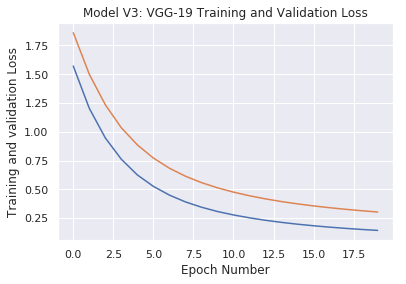

In [18]:
#Define the pretrained VGG-19 model
modelV3 = models.vgg19(pretrained=True)

for param in modelV3.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV3 = Classifier()
modelV3.classifier=classifierV3

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV3.classifier.parameters(), lr = 0.001)

#Move the model to the GPU. 
modelV3.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV3 = []
validLossListV3 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV3.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelV3.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV3.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelV3(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV3.append(train_loss)
    validLossListV3.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV3)), trainLossListV3)
plt.plot(np.arange(len(validLossListV3)), validLossListV3)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V3: VGG-19 Training and Validation Loss')
plt.show()

In [19]:
#Test Model V3 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV3.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV3(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.079644

Test Accuracy of monkey1: 96% (25/26) 
Test Accuracy of monkey2: 96% (27/28) 
Test Accuracy of monkey3: 95% (20/21) 
Test Accuracy of monkey4: 100% (31/31) 
Test Accuracy of monkey5: 97% (34/35) 
Test Accuracy of monkey6: 89% (17/19) 
Test Accuracy of monkey7: 96% (28/29) 
Test Accuracy of monkey8: 100% (29/29) 
Test Accuracy of monkey9: 96% (27/28) 
Test Accuracy of monkey10: 96% (25/26) 

Test Accuracy (Overall): 96% (263/272)


## Model V4: VGG-13 with Batch Normalization

Downloading: "https://download.pytorch.org/models/vgg13_bn-abd245e5.pth" to /root/.cache/torch/checkpoints/vgg13_bn-abd245e5.pth
100%|██████████| 532246301/532246301 [00:16<00:00, 32068459.28it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.684731 	Validation Loss: 2.158709
Epoch: 1 	Training Loss: 1.571324 	Validation Loss: 2.029127
Epoch: 2 	Training Loss: 1.448768 	Validation Loss: 1.889507
Epoch: 3 	Training Loss: 1.313438 	Validation Loss: 1.738365
Epoch: 4 	Training Loss: 1.176087 	Validation Loss: 1.582851
Epoch: 5 	Training Loss: 1.039661 	Validation Loss: 1.430347
Epoch: 6 	Training Loss: 0.908084 	Validation Loss: 1.287730
Epoch: 7 	Training Loss: 0.793952 	Validation Loss: 1.159235
Epoch: 8 	Training Loss: 0.692319 	Validation Loss: 1.045746
Epoch: 9 	Training Loss: 0.607980 	Validation Loss: 0.948315
Epoch: 10 	Training Loss: 0.534154 	Validation Loss: 0.864537
Epoch: 11 	Training Loss: 0.470078 	Validation Loss: 0.792368
Epoch: 12 	Training Loss: 0.416403 	Validation Loss: 0.731213
Epoch: 13 	Training Loss: 0.374707 	Validation Loss: 0.678123
Epoch: 14 	Training Loss: 0.337157 	Validation Loss: 0.632925
Epoch: 15 	Training Loss: 0.307534 	Val

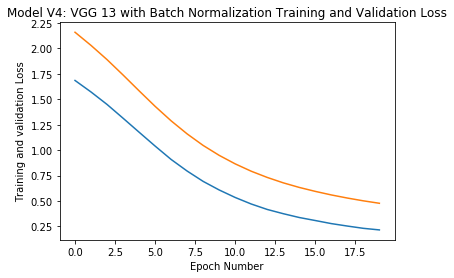

In [8]:
#Define the pretrained ResNet101 model
modelV4 = models.vgg13_bn(pretrained=True)

for param in modelV4.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV4 = Classifier()
modelV4.classifier=classifierV4

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV4.classifier.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelV4.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV4 = []
validLossListV4 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV4.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelV4.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV4.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelV4(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV4.append(train_loss)
    validLossListV4.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV4)), trainLossListV4)
plt.plot(np.arange(len(validLossListV4)), validLossListV4)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V4: VGG 13 with Batch Normalization Training and Validation Loss')
plt.show()

In [9]:
#Test Model V4 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV4.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV4(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.122029

Test Accuracy of monkey1: 88% (23/26) 
Test Accuracy of monkey2: 100% (28/28) 
Test Accuracy of monkey3: 90% (19/21) 
Test Accuracy of monkey4: 100% (30/30) 
Test Accuracy of monkey5: 97% (34/35) 
Test Accuracy of monkey6: 100% (19/19) 
Test Accuracy of monkey7: 100% (29/29) 
Test Accuracy of monkey8: 96% (28/29) 
Test Accuracy of monkey9: 96% (28/29) 

Test Accuracy (Overall): 96% (262/272)


## Model V5: VGG-16 with Batch Normalization


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:14<00:00, 39371300.12it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.677776 	Validation Loss: 2.108463
Epoch: 1 	Training Loss: 1.528237 	Validation Loss: 1.930772
Epoch: 2 	Training Loss: 1.370989 	Validation Loss: 1.746264
Epoch: 3 	Training Loss: 1.204133 	Validation Loss: 1.560007
Epoch: 4 	Training Loss: 1.040315 	Validation Loss: 1.382283
Epoch: 5 	Training Loss: 0.890519 	Validation Loss: 1.220322
Epoch: 6 	Training Loss: 0.764186 	Validation Loss: 1.081023
Epoch: 7 	Training Loss: 0.659374 	Validation Loss: 0.962478
Epoch: 8 	Training Loss: 0.570629 	Validation Loss: 0.862996
Epoch: 9 	Training Loss: 0.497191 	Validation Loss: 0.778791
Epoch: 10 	Training Loss: 0.435271 	Validation Loss: 0.706880
Epoch: 11 	Training Loss: 0.384038 	Validation Loss: 0.647392
Epoch: 12 	Training Loss: 0.340044 	Validation Loss: 0.597443
Epoch: 13 	Training Loss: 0.305158 	Validation Loss: 0.554020
Epoch: 14 	Training Loss: 0.274403 	Validation Loss: 0.517006
Epoch: 15 	Training Loss: 0.251676 	Val

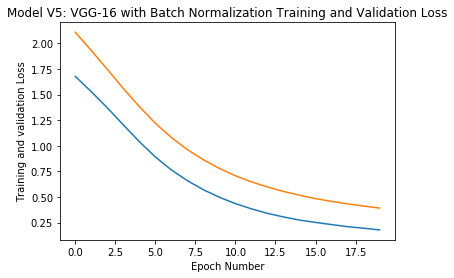

In [10]:
#Define the pretrained VGG model
modelV5 = models.vgg16_bn(pretrained=True)

for param in modelV5.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV5 = Classifier()
modelV5.classifier=classifierV5

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV5.classifier.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelV5.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV5 = []
validLossListV5 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV5.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelV5.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV5.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelV5(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV5.append(train_loss)
    validLossListV5.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV5)), trainLossListV5)
plt.plot(np.arange(len(validLossListV5)), validLossListV5)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V5: VGG-16 with Batch Normalization Training and Validation Loss')
plt.show()

In [11]:
#Test Model V5 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV5.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV5(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.104184

Test Accuracy of monkey1: 96% (26/27) 
Test Accuracy of monkey2: 100% (28/28) 
Test Accuracy of monkey3: 95% (19/20) 
Test Accuracy of monkey4: 100% (31/31) 
Test Accuracy of monkey5: 97% (34/35) 
Test Accuracy of monkey6: 94% (18/19) 
Test Accuracy of monkey7: 100% (28/28) 
Test Accuracy of monkey8: 93% (27/29) 
Test Accuracy of monkey9: 100% (29/29) 

Test Accuracy (Overall): 97% (264/272)


## Model V6: VGG-19 with Batch Normalization


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:24<00:00, 23118411.45it/s]


The models new classifier has been added
Epoch: 0 	Training Loss: 1.668616 	Validation Loss: 2.089136
Epoch: 1 	Training Loss: 1.504548 	Validation Loss: 1.890772
Epoch: 2 	Training Loss: 1.330779 	Validation Loss: 1.687498
Epoch: 3 	Training Loss: 1.154808 	Validation Loss: 1.490787
Epoch: 4 	Training Loss: 0.983516 	Validation Loss: 1.305728
Epoch: 5 	Training Loss: 0.839516 	Validation Loss: 1.143568
Epoch: 6 	Training Loss: 0.711020 	Validation Loss: 1.004703
Epoch: 7 	Training Loss: 0.609397 	Validation Loss: 0.890623
Epoch: 8 	Training Loss: 0.524404 	Validation Loss: 0.796251
Epoch: 9 	Training Loss: 0.457067 	Validation Loss: 0.716956
Epoch: 10 	Training Loss: 0.399652 	Validation Loss: 0.650054
Epoch: 11 	Training Loss: 0.354077 	Validation Loss: 0.593961
Epoch: 12 	Training Loss: 0.316463 	Validation Loss: 0.546142
Epoch: 13 	Training Loss: 0.284790 	Validation Loss: 0.507829
Epoch: 14 	Training Loss: 0.255925 	Validation Loss: 0.473799
Epoch: 15 	Training Loss: 0.231225 	Val

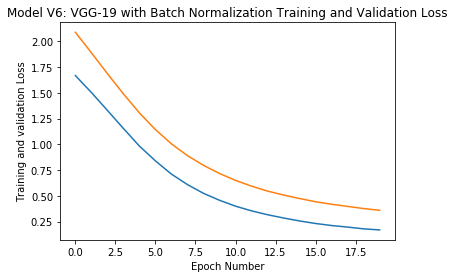

In [12]:
#Define the pretrained VGG model
modelV6 = models.vgg19_bn(pretrained=True)

for param in modelV6.parameters():
    param.requires_grad=False

#Define the classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25088,1000)
        #The output must be 10 to match the 10 monkey species classes
        self.fc2 = nn.Linear(1000,10)
        
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x

#Instantiate the classifier and add it to the model
classifierV6 = Classifier()
modelV6.classifier=classifierV6

print("The models new classifier has been added")

#Define the criterion and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.NLLLoss()
optimizer = optim.SGD(modelV6.classifier.parameters(), lr = 0.01)

#Move the model to the GPU. 
modelV6.to(device)

# Train the model with the pretrained weights
epochs = 20

trainLossListV6 = []
validLossListV6 = []

for epoch in range(epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    modelV6.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        logps = modelV6.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        train_loss +=loss.item()*inputs.size(0)
    train_loss = train_loss/len(train_dataloader.dataset)
    
    modelV6.eval()
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = modelV6(inputs)
        loss = criterion(output, labels)
        valid_loss += loss.item()*inputs.size(0)
    valid_loss = valid_loss/len(valid_dataloader.dataset)
    
    trainLossListV6.append(train_loss)
    validLossListV6.append(valid_loss)
    
    
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch,train_loss, valid_loss))
    
    
#Plot the train and validation losses
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(trainLossListV6)), trainLossListV6)
plt.plot(np.arange(len(validLossListV6)), validLossListV6)
plt.ylabel('Training and validation Loss')
plt.xlabel('Epoch Number')
plt.title('Model V6: VGG-19 with Batch Normalization Training and Validation Loss')
plt.show()

In [0]:
#Test Model V5 on the test dataset

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


classes = ['monkey1', 'monkey2', 'monkey3', 'monkey4', 'monkey5', 'monkey6', 'monkey7',
          'monkey8', 'monkey9', 'monkey10']
modelV6.eval()
for tdata, ttarget in test_dataloader:
    tdata,ttarget = tdata.cuda(), ttarget.cuda()
    
    output = modelV6(tdata)
    loss = criterion(output, ttarget)
    test_loss += loss.item()*tdata.size(0)
    _, pred = torch.max(output,1)
    
    correct_tensor = pred.eq(ttarget.data.view_as(pred))  
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    for i in range(1,batch_size):
        label = ttarget.data[i-1]
        class_correct[label] += correct[i].item()
        class_total[label] += 1


test_loss = test_loss/len(test_dataloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,9):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d) ' %( classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct)/ np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.484424

Test Accuracy of monkey1: 85% (18/21) 
Test Accuracy of monkey2: 95% (22/23) 
Test Accuracy of monkey3: 85% (24/28) 
Test Accuracy of monkey4: 72% (16/22) 
Test Accuracy of monkey5: 73% (22/30) 
Test Accuracy of monkey6: 83% (20/24) 
Test Accuracy of monkey7: 83% (25/30) 
Test Accuracy of monkey8: 62% (18/29) 
Test Accuracy of monkey9: 74% (26/35) 

Test Accuracy (Overall): 79% (217/272)


## Comparing Models R1-R5

* Models R1-R5 accuracies are recreated in the below table

| Model | Overall Test Accuracy | 
| ----| ----|
|Model R1: ResNet-18 |   |
|Model R2: ResNet-34 |   |
|Model R3: ResNet-50 |   |
|Model R4: ResNet-101 |   |
|Model R5: ResNet-152|   |


Text(0, 0.5, 'Training Loss')

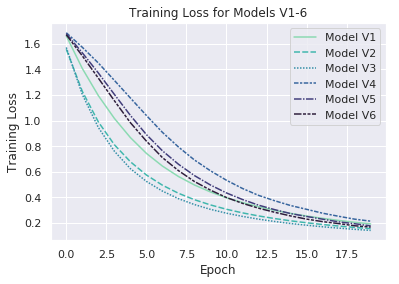

In [20]:
# To better compare how the architecture of the different networks affects its learning potential for a fine-grain classification task,
#       Figure 1: Plot of Training Loss
#       Figure 2: Plot of Validation Loss


sns.set(style="darkgrid")

trainingLoss_df = pd.DataFrame(list(zip(trainLossListV1, trainLossListV2, trainLossListV3, trainLossListV4, trainLossListV5, trainLossListV6)),
                              columns = ['Model V1','Model V2','Model V3','Model V4', 'Model V5','Model V6'])
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data=trainingLoss_df, palette=palette).set_title('Training Loss for Models V1-6')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Validation Loss')

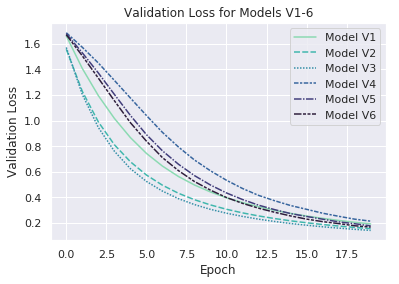

In [21]:
validLoss_df = pd.DataFrame(list(zip(validLossListV1, validLossListV2, validLossListV3, validLossListV4, validLossListV5, validLossListV6)),
                              columns = ['Model V1','Model V2','Model V3','Model v4', 'Model V5', 'Model V6'])
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data=trainingLoss_df, palette=palette).set_title('Validation Loss for Models V1-6')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')